In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score


In [3]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

## Explore Data 

In [4]:
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
484,485,1,1,"Bishop, Mr. Dickinson H",male,25.0,1,0,11967,91.0792,B49,C


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
SumNull = train_data.isna().sum()
SumNull[SumNull > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

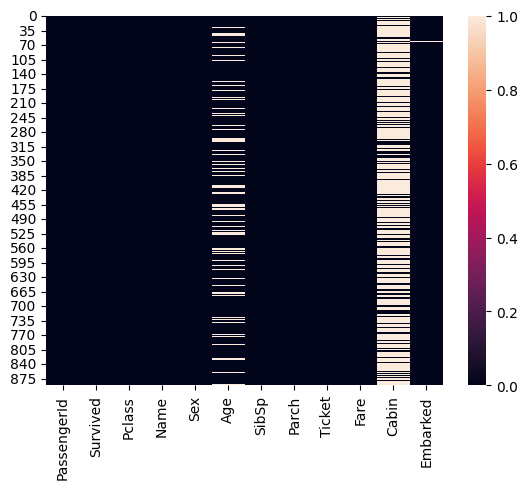

In [10]:
sns.heatmap(train_data.isna())

## 2- Clean data

In [11]:
def clean(d):
    d.drop(['Cabin','Name','Ticket','Embarked','Fare','Sex'], axis = 1, inplace = True)
    d.Age = d.Age.fillna(d.Age.median())
    d.dropna()
    return d

In [12]:
clean(train_data)

,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,1,0,3,22.0,1,0
1,2,1,1,38.0,1,0
2,3,1,3,26.0,0,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,0
...,...,...,...,...,...,...
886,887,0,2,27.0,0,0
887,888,1,1,19.0,0,0
888,889,0,3,28.0,1,2
889,890,1,1,26.0,0,0


In [13]:
clean(test_data)

,PassengerId,Pclass,Age,SibSp,Parch
0,892,3,34.5,0,0
1,893,3,47.0,1,0
2,894,2,62.0,0,0
3,895,3,27.0,0,0
4,896,3,22.0,1,1
...,...,...,...,...,...
413,1305,3,27.0,0,0
414,1306,1,39.0,0,0
415,1307,3,38.5,0,0
416,1308,3,27.0,0,0


<Axes: >

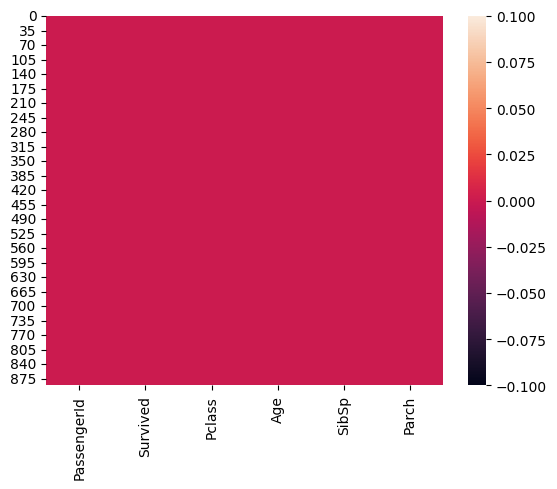

In [14]:
sns.heatmap(train_data.isna())

## 3- Data Analysis

In [15]:
co = train_data.corr()

<Axes: >

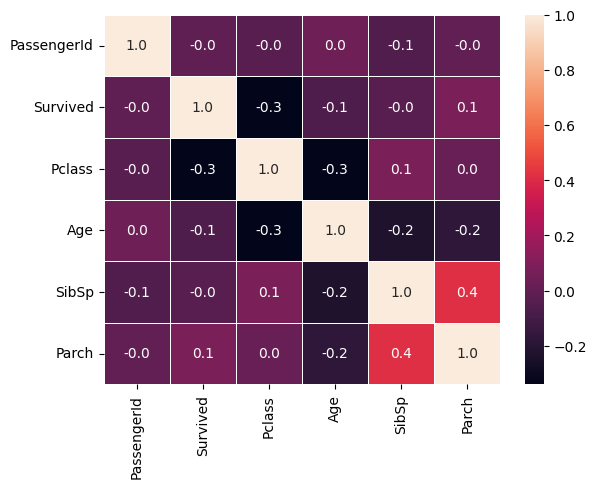

In [16]:
sns.heatmap(co, annot = True, fmt = '.1f', linewidth =.5)

In [17]:
train_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

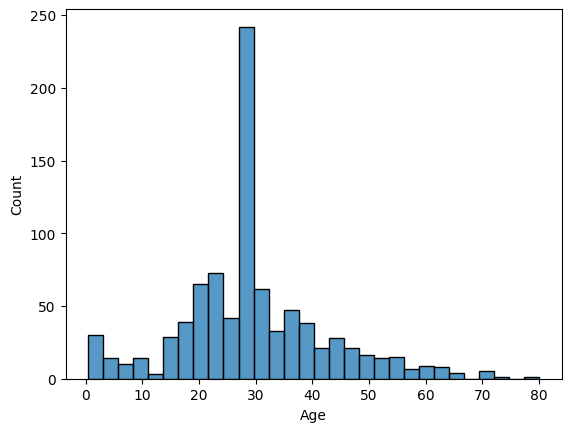

In [18]:
sns.histplot(train_data.Age)

## 4- Transform Data

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [20]:
test_data

,PassengerId,Pclass,Age,SibSp,Parch
0,892,3,34.5,0,0
1,893,3,47.0,1,0
2,894,2,62.0,0,0
3,895,3,27.0,0,0
4,896,3,22.0,1,1
...,...,...,...,...,...
413,1305,3,27.0,0,0
414,1306,1,39.0,0,0
415,1307,3,38.5,0,0
416,1308,3,27.0,0,0


In [21]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,1,0,3,22.0,1,0
1,2,1,1,38.0,1,0
2,3,1,3,26.0,0,0
3,4,1,1,35.0,1,0
4,5,0,3,35.0,0,0
...,...,...,...,...,...,...
886,887,0,2,27.0,0,0
887,888,1,1,19.0,0,0
888,889,0,3,28.0,1,2
889,890,1,1,26.0,0,0


## 5- Creat Model

In [22]:
x = train_data.drop(['Survived'], axis =1)
y = train_data.Survived

In [23]:
x_train_data,x_test_data,y_train_data,y_test_data = train_test_split(x,y,train_size = .8)

In [24]:
accuracies=[]

In [25]:
def all(model):
    model.fit(x_train_data, y_train_data)
    pre = model1.predict(x_test_data)
    accuracy = accuracy_score(pre,y_test_data)
    print('Accuracy =', accuracy)
    accuracies.append(accuracy)
    

In [26]:
model1 = LogisticRegression()
all(model1)

Accuracy = 0.7094972067039106


In [27]:
model1 = RandomForestClassifier()
all(model1)

Accuracy = 0.6815642458100558


In [28]:
model3= GradientBoostingClassifier()
all(model3)

Accuracy = 0.6815642458100558


In [29]:
model4 = DecisionTreeClassifier()
all(model4)

Accuracy = 0.6815642458100558


In [30]:
model5 = KNeighborsClassifier()
all(model5)

Accuracy = 0.6815642458100558


In [31]:
model6 = GaussianNB()
all(model6)

Accuracy = 0.6815642458100558


In [32]:
model7 =SVC()
all(model7)

Accuracy = 0.6815642458100558


In [33]:
Algorithms = [' LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC']

In [34]:
new = pd.DataFrame({'Algorithms':Algorithms,'accuracies':accuracies})

In [35]:
new

,Algorithms,accuracies
0,LogisticRegression,0.709497
1,RandomForestClassifier,0.681564
2,GradientBoostingClassifier,0.681564
3,DecisionTreeClassifier,0.681564
4,KNeighborsClassifier,0.681564
5,GaussianNB,0.681564
6,SVC,0.681564


In [36]:
modelx = GradientBoostingClassifier()
modelx.fit(x_train_data,y_train_data)

GradientBoostingClassifier()

In [37]:
lpre = modelx.predict(test_data)

In [38]:
final = test_data.PassengerId

In [39]:
new_dataFrame = pd.DataFrame({'PassengerId':final,'Survived':lpre})

In [40]:
new_dataFrame.to_csv()

',PassengerId,Survived\n0,892,0\n1,893,0\n2,894,0\n3,895,0\n4,896,0\n5,897,0\n6,898,0\n7,899,1\n8,900,0\n9,901,0\n10,902,0\n11,903,0\n12,904,1\n13,905,0\n14,906,1\n15,907,0\n16,908,0\n17,909,0\n18,910,0\n19,911,0\n20,912,1\n21,913,0\n22,914,1\n23,915,1\n24,916,1\n25,917,0\n26,918,1\n27,919,0\n28,920,1\n29,921,0\n30,922,0\n31,923,0\n32,924,0\n33,925,0\n34,926,1\n35,927,0\n36,928,0\n37,929,0\n38,930,0\n39,931,0\n40,932,0\n41,933,1\n42,934,0\n43,935,0\n44,936,1\n45,937,0\n46,938,1\n47,939,0\n48,940,0\n49,941,0\n50,942,1\n51,943,0\n52,944,0\n53,945,1\n54,946,0\n55,947,0\n56,948,0\n57,949,0\n58,950,0\n59,951,1\n60,952,0\n61,953,0\n62,954,0\n63,955,0\n64,956,1\n65,957,0\n66,958,0\n67,959,0\n68,960,1\n69,961,1\n70,962,0\n71,963,0\n72,964,0\n73,965,1\n74,966,1\n75,967,1\n76,968,0\n77,969,1\n78,970,0\n79,971,0\n80,972,1\n81,973,0\n82,974,1\n83,975,0\n84,976,0\n85,977,0\n86,978,0\n87,979,0\n88,980,0\n89,981,1\n90,982,0\n91,983,0\n92,984,1\n93,985,0\n94,986,1\n95,987,0\n96,988,1\n97,989,0\n98,990